1:

          date      values  year  day  month
0   2021-01-31    6.000000  2021   31      1
1   2021-02-28   45.347458  2021   28      2
2   2021-03-31   29.694915  2021   31      3
3   2021-04-30   26.042373  2021   30      4
4   2021-05-31   28.389831  2021   31      5
..         ...         ...   ...  ...    ...
114 2030-07-31  735.610169  2030   31      7
115 2030-08-31  731.957627  2030   31      8
116 2030-09-30  777.305085  2030   30      9
117 2030-10-31  752.652542  2030   31     10
118 2030-11-30  767.000000  2030   30     11

[119 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    119 non-null    datetime64[ns]
 1   values  119 non-null    float64       
 2   year    119 non-null    int32         
 3   day     119 non-null    int32         
 4   month   119 non-null    int32         
dtypes: datetime64[ns](1

C:\Users\haroo\AppData\Local\Temp\ipykernel_5248\772637954.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date=pd.date_range(start='01-01-21',end='30-12-30',freq='M')
C:\Users\haroo\AppData\Local\Temp\ipykernel_5248\772637954.py:10: DeprecationWarning: This function is deprecated. Please call randint(1, 40 + 1) instead
  ip=values+np.random.random_integers(1,40,len(date))


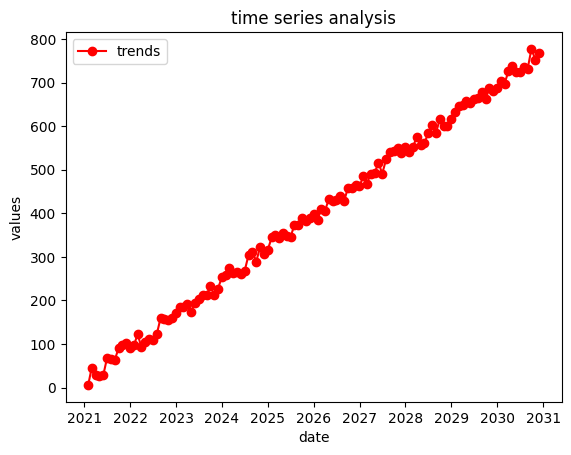

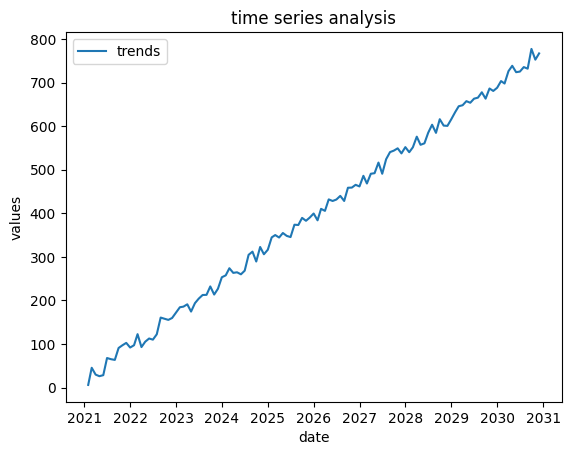

In [1]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np
import seaborn as sp
#creating a date from 01-01-2021 to 30-12-2030
#the data dosen't contains any noise you easily visualize an positive linear trend in it
date=pd.date_range(start='01-01-21',end='30-12-30',freq='M')
#creating a valus column with parallel to date range
values=np.linspace(1,750,len(date))
ip=values+np.random.random_integers(1,40,len(date))
df=pd.DataFrame({'date':date,'values':ip})
#creating seperate column for year,day,month
df['year']=df['date'].dt.year
df['day']=df['date'].dt.day
df['month']=df['date'].dt.month
print(df)
df.info()
pt.plot(df['date'],df['values'],linestyle='-',marker='o',color='red',label='trends')
pt.title('time series analysis')
pt.xlabel('date')
pt.ylabel('values')
pt.legend()
pt.show()
sp.set_style='whitegrid'
sp.lineplot(x=df['date'],y=df['values'],label='trends')
pt.title('time series analysis')
pt.xlabel('date')
pt.ylabel('values')
pt.legend()
pt.show()

2:

C:\Users\haroo\AppData\Local\Temp\ipykernel_5248\35122769.py:8: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  date=pd.date_range(start='01-01-21',end='30-12-30',freq='m')
C:\Users\haroo\AppData\Local\Temp\ipykernel_5248\35122769.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 30 + 1) instead
  ip=values+np.random.random_integers(1,30,len(date))


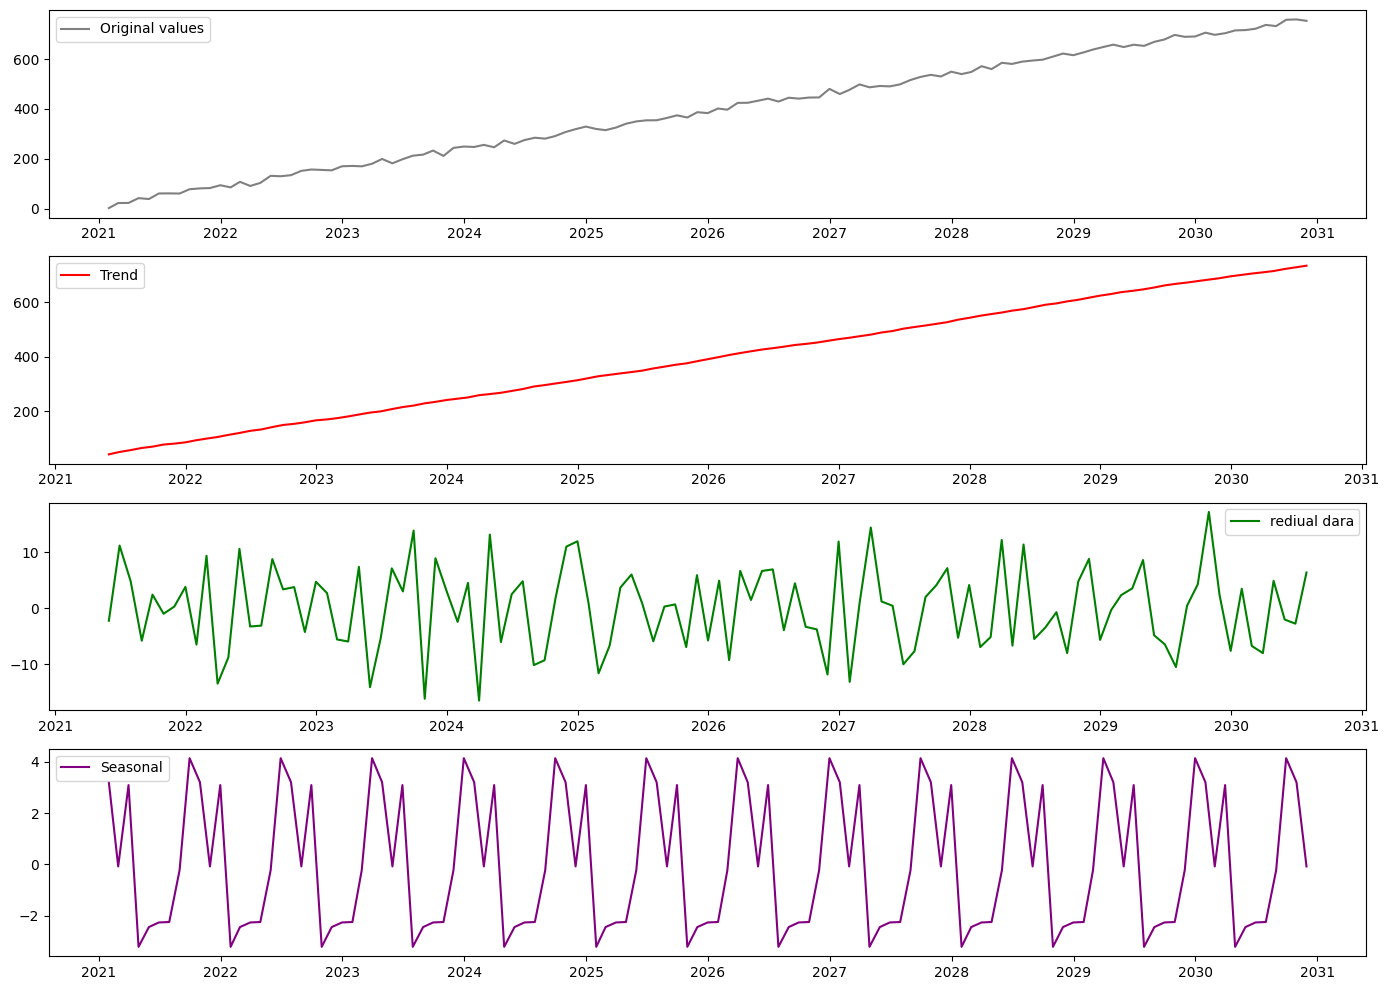

In [3]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np
import seaborn as sp
from statsmodels.tsa.seasonal import seasonal_decompose
#creating a date from 01-01-2021 to 30-12-2030
#the data dosen't contains any noise you easily visualize an positive linear trend in it
date=pd.date_range(start='01-01-21',end='30-12-30',freq='m')
#creating a valus column with parallel to date range
values=np.linspace(1,750,len(date))
ip=values+np.random.random_integers(1,30,len(date))
df=pd.DataFrame({'date':date,'values':ip})
s=seasonal_decompose(df["values"],model='additive',period=9)
e=s.resid
t=s.trend
s=s.seasonal
pt.figure(figsize=(14,10))
pt.subplot(411)
pt.plot(df['date'],df['values'],label='Original values',color='grey')
pt.legend()

pt.subplot(412)
pt.plot(df['date'],t,label='Trend',color='red')
pt.legend()

pt.subplot(413)
pt.plot(df['date'],e,label='rediual dara',color='green')
pt.legend()

pt.subplot(414)
pt.plot(df['date'],s,label='Seasonal',color='purple')
pt.legend()
pt.tight_layout()
pt.show()


3:

The time series may contains a 'Trend'
          date       values    dvalues
0   2021-01-31    75.000000        NaN
1   2021-02-28   105.466102  30.466102
2   2021-03-31    66.932203 -38.533898
3   2021-04-30    49.398305 -17.533898
4   2021-05-31    71.864407  22.466102
..         ...          ...        ...
114 2030-07-31  1062.135593  27.466102
115 2030-08-31  1060.601695  -1.533898
116 2030-09-30  1071.067797  10.466102
117 2030-10-31  1002.533898 -68.533898
118 2030-11-30  1007.000000   4.466102

[119 rows x 3 columns]


C:\Users\haroo\AppData\Local\Temp\ipykernel_5248\1546908493.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  ip=values+np.random.random_integers(1,100,len(date))


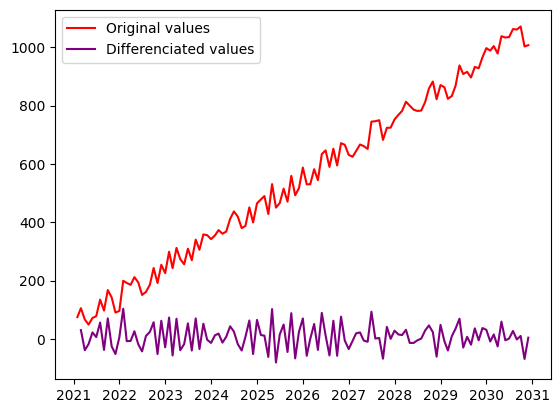

In [5]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np
from statsmodels.tsa.stattools import adfuller
#creating a date from 01-01-2021 to 30-12-2030
#the data dosen't contains any noise you easily visualize an positive linear trend in it
date=pd.date_range(start='01-01-21',end='30-12-30',freq='ME')
#creating a valus column with parallel to date range
values=np.linspace(1,1000,len(date))
#creating noise over a linear data
ip=values+np.random.random_integers(1,100,len(date))
df=pd.DataFrame({'date':date,'values':ip})
#finding hypothesis
r=adfuller(df['values'],autolag="AIC")
if r[1]<=0.05:
    print("Rject null hypothesis.The time series is likely stationary")
else:
    print("The time series may contains a 'Trend'")
df['dvalues']=df['values'].diff()
print(df)
pt.plot(df['date'],df['values'],label='Original values',color="red")
pt.plot(df['date'],df['dvalues'],label='Differenciated values',color="purple")
pt.legend()
pt.show()


4:

In [6]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np
from statsmodels.tsa.stattools import adfuller
#creating a date from 01-01-2021 to 30-12-2030
#the data dosen't contains any noise you easily visualize an positive linear trend in it
date=pd.date_range(start='01-01-21',end='30-12-30',freq='H')
#creating a valus column with parallel to date range
values=np.linspace(1,1000,len(date))
#creating noise over the data
ip=values+np.random.random_integers(1,100,len(date))
df=pd.DataFrame({'date':date,'values':ip})
df.set_index('date',inplace=True)
print(df)
#resampling of date for conviniance
daily=df.resample("D").mean()
print(daily)
monthly=df.resample("M").mean()
print(monthly)
s30min=df.resample("30T").ffill()
print(s30min)
weekely=df.resample("W").sum()
print(weekely)
#date and time aggregation
dfcombo=df.resample("30MIN").ffill().resample("D").mean()
print(dfcombo)


                          values
date                            
2021-01-01 00:00:00    14.000000
2021-01-01 01:00:00    69.011404
2021-01-01 02:00:00    43.022808
2021-01-01 03:00:00    76.034212
2021-01-01 04:00:00    92.045616
...                          ...
2030-12-29 20:00:00  1063.954384
2030-12-29 21:00:00  1019.965788
2030-12-29 22:00:00  1041.977192
2030-12-29 23:00:00  1037.988596
2030-12-30 00:00:00  1010.000000

[87601 rows x 1 columns]
                 values
date                   
2021-01-01    60.631147
2021-01-02    58.738179
2021-01-03    58.845211
2021-01-04    54.118910
2021-01-05    52.809275
...                 ...
2030-12-26  1046.953019
2030-12-27  1051.560051
2030-12-28  1049.708750
2030-12-29  1035.607449
2030-12-30  1010.000000

[3651 rows x 1 columns]
                 values
date                   
2021-01-31    56.129100
2021-02-28    63.258653
2021-03-31    70.356620
2021-04-30    79.821543
2021-05-31    89.545516
...                 ...
2030-08-31  1011

C:\Users\haroo\AppData\Local\Temp\ipykernel_5248\4282587539.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date=pd.date_range(start='01-01-21',end='30-12-30',freq='H')
C:\Users\haroo\AppData\Local\Temp\ipykernel_5248\4282587539.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  ip=values+np.random.random_integers(1,100,len(date))
C:\Users\haroo\AppData\Local\Temp\ipykernel_5248\4282587539.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly=df.resample("M").mean()
C:\Users\haroo\AppData\Local\Temp\ipykernel_5248\4282587539.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  s30min=df.resample("30T").ffill()
C:\Users\haroo\AppData\Local\Temp\ipykernel_5248\4282587539.py:25: FutureWarning: 'MIN' is deprecated and will be removed in a future version, please use 'min'

5:

C:\Users\haroo\AppData\Local\Temp\ipykernel_5248\2363312615.py:12: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  ip=values+np.random.random_integers(1,100,len(date))


                          values
date                            
2021-01-01 00:00:00    26.000000
2021-01-01 01:00:00    92.011404
2021-01-01 02:00:00     3.022808
2021-01-01 03:00:00    72.034212
2021-01-01 04:00:00    31.045616
...                          ...
2030-12-29 20:00:00  1014.954384
2030-12-29 21:00:00  1097.965788
2030-12-29 22:00:00  1017.977192
2030-12-29 23:00:00  1080.988596
2030-12-30 00:00:00  1094.000000

[87601 rows x 1 columns]


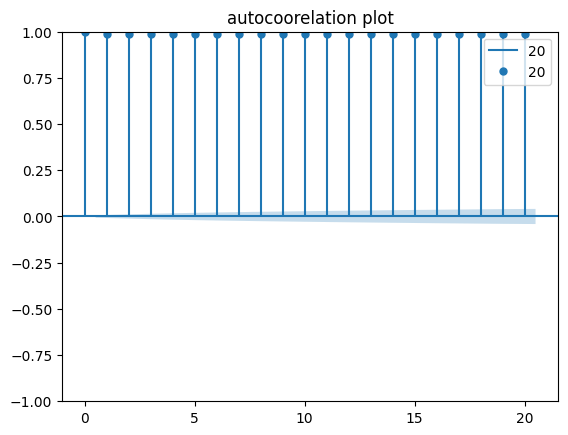

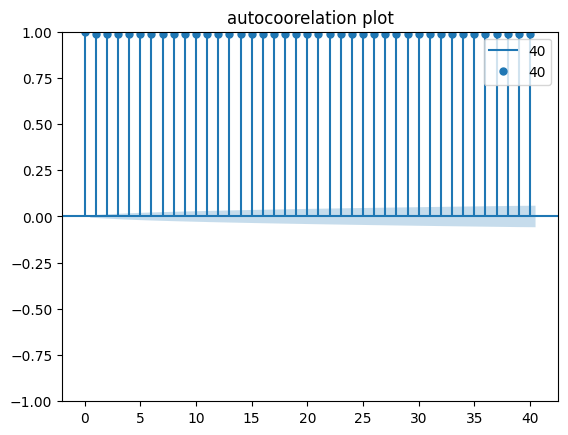

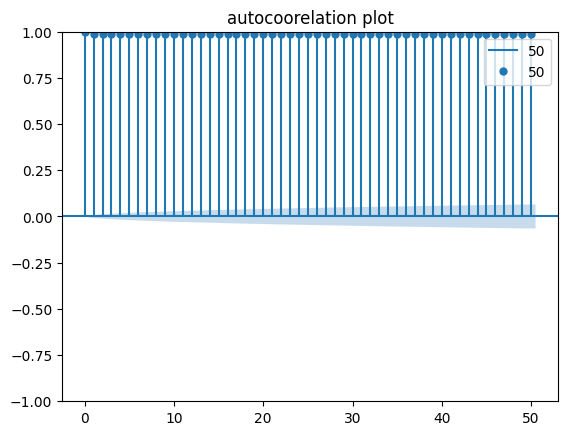

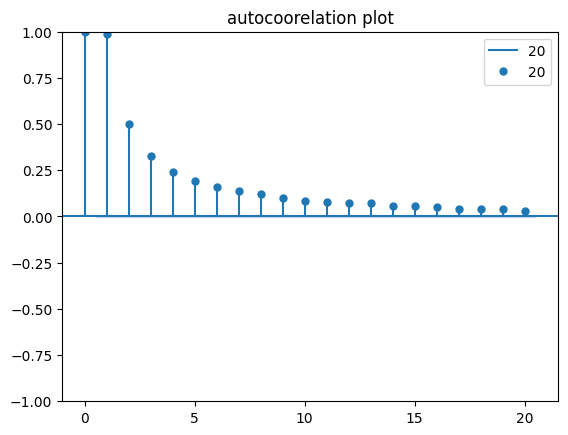

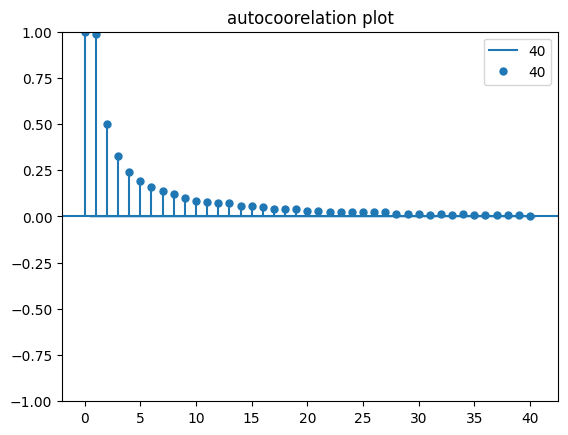

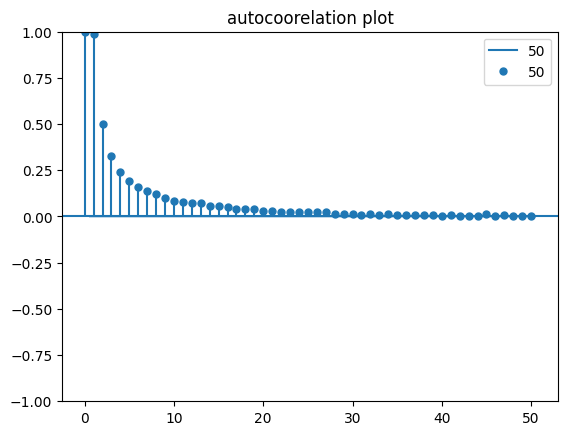

In [8]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#creating a date from 01-01-2021 to 30-12-2030
#the data dosen't contains any noise you easily visualize an positive linear trend in it
date=pd.date_range(start='01-01-21',end='30-12-30',freq='h')
#creating a valus column with parallel to date range
values=np.linspace(1,1000,len(date))
#creating noise over the data
ip=values+np.random.random_integers(1,100,len(date))
df=pd.DataFrame({'date':date,'values':ip})
df.set_index('date',inplace=True)
print(df)
lags=[20,40,50]
for i in lags:
    plot_acf(df['values'],lags=i,label=i)
    pt.legend()
    pt.title('autocoorelation plot')
    pt.show()
for i in lags:
    plot_pacf(df['values'],lags=i,label=i)
    pt.legend()
    pt.title('autocoorelation plot')
    pt.show()    


6:

C:\Users\haroo\AppData\Local\Temp\ipykernel_5248\87995732.py:8: DeprecationWarning: This function is deprecated. Please call randint(1, 30 + 1) instead
  ip=values+np.random.random_integers(1,30,len(date))
C:\Users\haroo\AppData\Local\Temp\ipykernel_5248\87995732.py:9: DeprecationWarning: This function is deprecated. Please call randint(1, 30 + 1) instead
  f1=values+np.random.random_integers(1,30,len(date))
C:\Users\haroo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\haroo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates

                values
date                  
2023-01-01   17.000000
2023-01-02    8.063361
2023-01-03   32.126722
2023-01-04   33.190083
2023-01-05   21.253444
...                ...
2023-12-26  744.746556
2023-12-27  761.809917
2023-12-28  767.873278
2023-12-29  752.936639
2023-12-30  773.000000

[364 rows x 1 columns]
                       SimpleExpSmoothing Model Results                       
Dep. Variable:                 values   No. Observations:                  364
Model:             SimpleExpSmoothing   SSE                          41438.787
Optimized:                       True   AIC                           1727.474
Trend:                           None   BIC                           1735.268
Seasonal:                        None   AICC                          1727.585
Seasonal Periods:                None   Date:                 Mon, 16 Dec 2024
Box-Cox:                        False   Time:                         21:56:05
Box-Cox Coeff.:                  None        

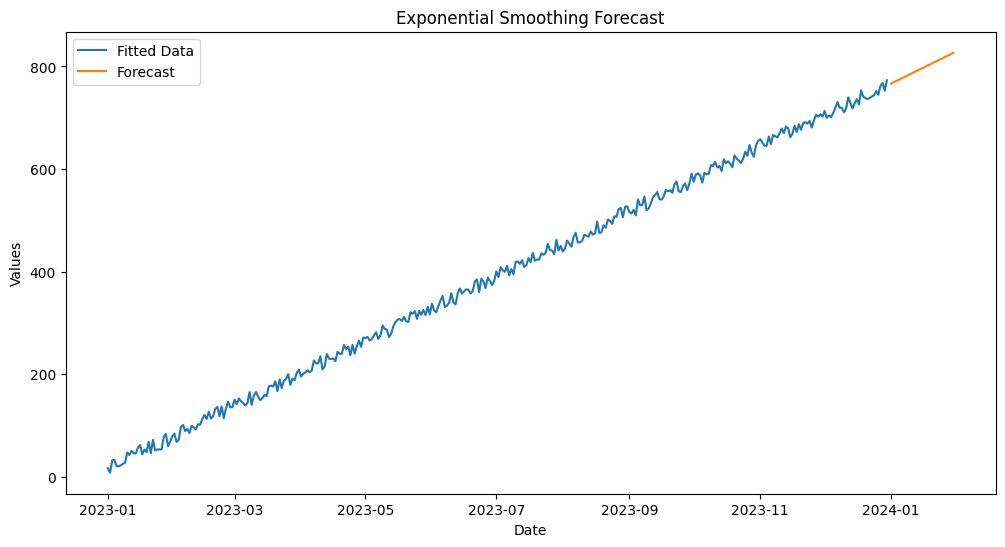

In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as mp
date=pd.date_range(start='01-01-2023',end='30-12-2023',freq='D')
values=np.linspace(1,750,len(date))
ip=values+np.random.random_integers(1,30,len(date))
f1=values+np.random.random_integers(1,30,len(date))
df=pd.DataFrame({'date':date,'values':ip,'featue1':f1})
dfc=df[["date","values"]].set_index("date")
print(dfc)
model=SimpleExpSmoothing(dfc['values'])
r=model.fit()
print(r.summary())
dmodel=ExponentialSmoothing(dfc['values'],trend='additive')
s=dmodel.fit()
print(s.summary())
tmodel=ExponentialSmoothing(dfc['values'],trend='additive',seasonal='add',seasonal_periods=3)
t=tmodel.fit()
print(t.summary())
s=30
y=t.forecast(steps=s)
print(dfc)
print(y)
d = pd.date_range(start='2024-01-01', periods=s)
mp.figure(figsize=(12, 6)) 
mp.plot(dfc['values'], label='Fitted Data') 
mp.plot(d, y, label='Forecast') 
mp.title('Exponential Smoothing Forecast')
mp.xlabel('Date') 
mp.ylabel('Values') 
mp.legend() 
mp.show()

7:

C:\Users\haroo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\haroo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\haroo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


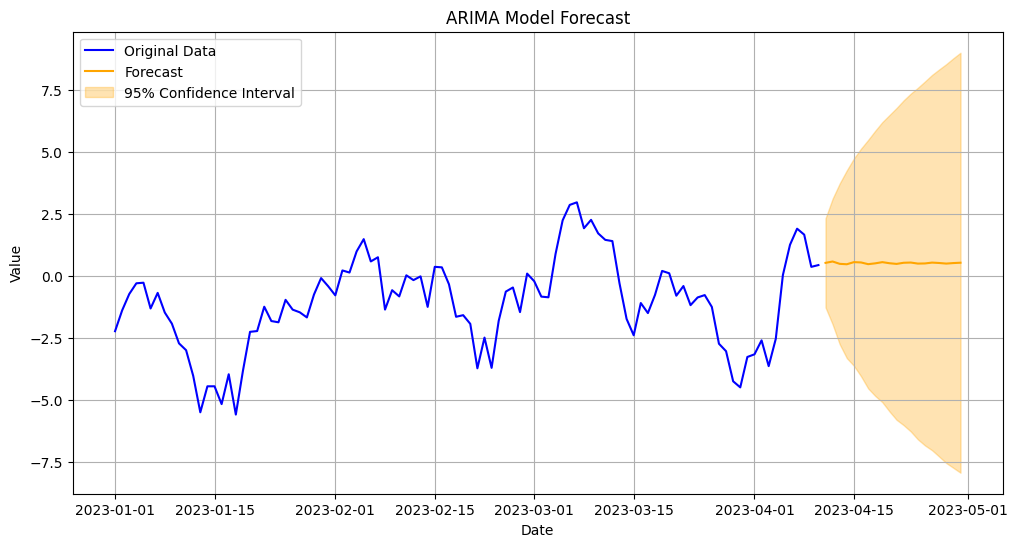

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate sample time series data
data = {
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'Value': np.cumsum(np.random.normal(0, 1, 100))  # Cumulative sum of random values
}
time_series = pd.DataFrame(data)
time_series.set_index('Date', inplace=True)

# Train ARIMA model
model = ARIMA(time_series, order=(2, 1, 2))  # Order: (p, d, q)
model_fit = model.fit()

# Forecast future values
forecast_steps = 20
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=time_series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
conf_int = forecast.conf_int()

# Plot original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Data', color='blue')
plt.plot(forecast_series, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3, label='95% Confidence Interval')
plt.legend(loc='upper left')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid()
plt.show()


8:Triple exponential smoothing(WIPRO)


• If the frequency is Minutewise Enter(N)
• If the frequency is Hourly Enter(H)
• If the frequency is Daywise Enter(D)
• If the frequency is weekely Enter(W)
• If the frequency is Monthly Enter(M)
• If the frequency is yearly Enter(Y)

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    close   No. Observations:                  510
Model:             ExponentialSmoothing   SSE                          50727.664
Optimized:                         True   AIC                           2569.906
Trend:                         Additive   BIC                           3044.160
Seasonal:                      Additive   AICC                          2636.286
Seasonal Periods:                   108   Date:                 Mon, 16 Dec 2024
Box-Cox:                          False   Time:                         22:03:12
Box-Cox Coeff.:                    None                                         
                           coeff  

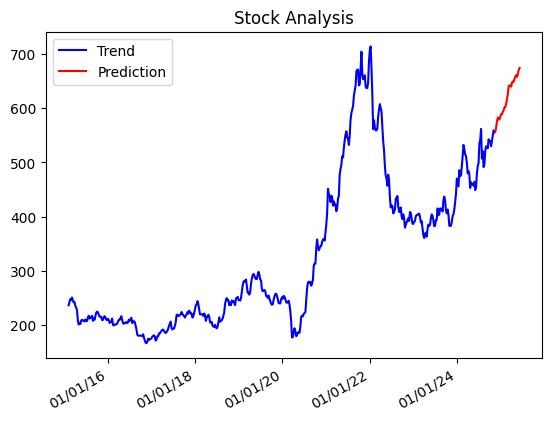

In [13]:

import pandas as pd
import matplotlib.pyplot as mp
import matplotlib.dates as mdates
from statsmodels.tsa.holtwinters import ExponentialSmoothing
print("\n• If the frequency is Minutewise Enter(N)\n• If the frequency is Hourly Enter(H)\n• If the frequency is Daywise Enter(D)\n• If the frequency is weekely Enter(W)\n• If the frequency is Monthly Enter(M)\n• If the frequency is yearly Enter(Y)\n")
n1=input("\n\nEnter your Date and Time frequency: ");n2=int(input("Enter your no.of.forcasing steps: "));fp=input(r"\nEnter the previous data file:")
df=pd.read_csv(fp,parse_dates=['date']).set_index('date');df.isnull().sum();df.ffill()
if n1=='N':
    x=int(input('how many hours data you have: '))
    df_min=df.resample('min').mean().ffill()
    model=ExponentialSmoothing(df_min['close'],trend='additive',seasonal='add',seasonal_periods=x);dd=model.fit();print(dd.summary());fc=dd.forecast(n2)
    mp.plot(df_min['close'],color='blue',label='Trend');mp.plot(fc,color='red',label='Prediction');mp.legend();mp.title('Stock Analysis');ax = mp.gca();ax.xaxis.set_major_formatter(mdates.DateFormatter('%D-%min'));mp.gcf().autofmt_xdate();mp.show()
elif n1=='H':
    x=int(input('how many days data you have: '))
    df_hourly=df.resample('h').mean().ffill()
    model=ExponentialSmoothing(df_hourly['close'],trend='additive',seasonal='add',seasonal_periods=x);dd=model.fit();print(dd.summary());fc=dd.forecast(n2)
    mp.plot(df_hourly['close'],color='blue',label='Trend');mp.plot(fc,color='red',label='Prediction');mp.legend();mp.title('Stock Analysis');ax = mp.gca();ax.xaxis.set_major_formatter(mdates.DateFormatter('%D-%h'));mp.gcf().autofmt_xdate();mp.show()
elif n1=='D':
    x=int(input('how many months data you have: '))
    df_daily=df.resample('d').mean().ffill()
    model=ExponentialSmoothing(df_daily['close'],trend='additive',seasonal='add',seasonal_periods=x);dd=model.fit();print(dd.summary());fc=dd.forecast(n2)
    mp.plot(df_daily['close'],color='blue',label='Trend');mp.plot(fc,color='red',label='Prediction');mp.legend();mp.title('Stock Analysis');ax = mp.gca();ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'));mp.gcf().autofmt_xdate();mp.show()
elif n1=='W':
    x=int(input('how many months you have: '))
    df_weekely=df.resample('W').mean().ffill()
    model=ExponentialSmoothing(df_weekely['close'],trend='additive',seasonal='add',seasonal_periods=x);dd=model.fit();print(dd.summary());fc=dd.forecast(n2)
    mp.plot(df_weekely['close'],color='blue',label='Trend');mp.plot(fc,color='red',label='Prediction');mp.legend();mp.title('Stock Analysis');ax = mp.gca();ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'));mp.gcf().autofmt_xdate();mp.show()
elif n1=='M':
    x=int(input('how many years data you have: '))
    df_monthly=df.resample('ME').mean().ffill()
    model=ExponentialSmoothing(df_monthly['close'],trend='additive',seasonal='add',seasonal_periods=x);dd=model.fit();print(dd.summary());fc=dd.forecast(n2)
    mp.plot(df_monthly['close'],color='blue',label='Trend');mp.plot(fc,color='red',label='Prediction');mp.legend();mp.title('Stock Analysis');ax = mp.gca();ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'));mp.gcf().autofmt_xdate();mp.show()


9:MarketAnalysis

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    close   No. Observations:                 3568
Model:             ExponentialSmoothing   SSE                          70028.202
Optimized:                         True   AIC                          10863.554
Trend:                         Additive   BIC                          11611.305
Seasonal:                      Additive   AICC                         10872.411
Seasonal Periods:                   117   Date:                 Mon, 16 Dec 2024
Box-Cox:                          False   Time:                         22:05:40
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9984133                alpha                 True
smoothing_trend       

C:\Users\haroo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


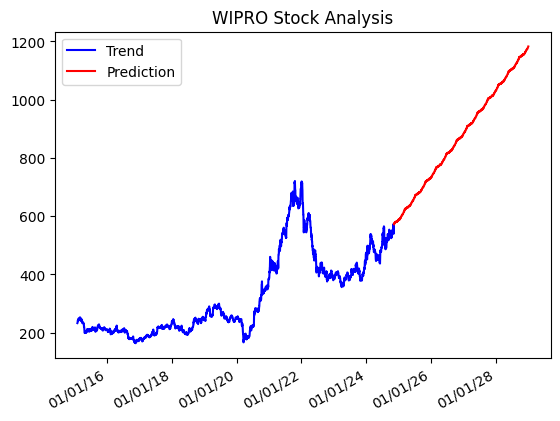

In [14]:
import pandas as pd
import matplotlib.pyplot as mp
import matplotlib.dates as mdates
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fp=input(r"\nEnter the previous data file:")
df=pd.read_csv(fp,parse_dates=['date']).set_index('date')
df.isnull().sum();df.ffill()
df_daily=df.resample('D').mean().ffill()
model=ExponentialSmoothing(df_daily['close'],trend='additive',seasonal='add',seasonal_periods=117)
dd=model.fit()
print(dd.summary())
fc=dd.forecast(1514)
mp.plot(df_daily['close'],color='blue',label='Trend')
mp.plot(fc,color='red',label='Prediction')
mp.legend()
mp.title('WIPRO Stock Analysis')
ax = mp.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
mp.gcf().autofmt_xdate()
mp.show()
